In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
0,CusID_00126,22.0,Male,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254,New_UI
1,CusID_00927,NaN,Female,Budapest,Central Hungary,9.0,2018-05-21,2020-01-26,0,6.115229,2.363926,6.968752,7.355854,8.561461,2.162229,Old_UI
2,CusID_01646,26.0,Male,Mumbai,Maharashtra,NaN,2019-02-15,2020-11-28,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563,New_UI
3,CusID_06228,NaN,Male,San Francisco,California,7.0,2019-07-18,2020-11-16,0,2.116475,9.064060,5.387599,NaN,0.459090,7.343461,New_UI
4,CusID_04239,29.0,Female,Taipei,Taiwan,NaN,2018-02-05,2020-03-12,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000,Old_UI


In [3]:
train.shape

(15150, 16)

In [4]:
train.duplicated().sum()

0

In [5]:
train.isnull().sum()

CustomerID                   0
Age                       1003
Gender                       0
City                         0
State                        0
No_of_orders_placed        773
Sign_up_date                 0
Last_order_placed_date       0
is_premium_member            0
Women’s_Clothing             0
Men’s_Clothing               0
Kid’s_Clothing             935
Home_&_Living              848
Beauty                       0
Electronics                  0
Preferred_Theme              0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              15150 non-null  object 
 1   Age                     14147 non-null  float64
 2   Gender                  15150 non-null  object 
 3   City                    15150 non-null  object 
 4   State                   15150 non-null  object 
 5   No_of_orders_placed     14377 non-null  float64
 6   Sign_up_date            15150 non-null  object 
 7   Last_order_placed_date  15150 non-null  object 
 8   is_premium_member       15150 non-null  int64  
 9   Women’s_Clothing        15150 non-null  float64
 10  Men’s_Clothing          15150 non-null  float64
 11  Kid’s_Clothing          14215 non-null  float64
 12  Home_&_Living           14302 non-null  float64
 13  Beauty                  15150 non-null  float64
 14  Electronics             15150 non-null

In [7]:
test = pd.read_csv('test.csv')
test.head()

,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics
0,CusID_09654,20.0,Female,Vancouver,British Columbia,5.0,2019-11-27,2020-03-22,0,4.000000,3.043023,6.231789,8.561328,9.893144,1.197478
1,CusID_09727,25.0,Not_Specified,Budapest,Central Hungary,11.0,2016-12-01,2021-08-22,1,4.379066,5.819171,6.923614,4.529057,5.105539,4.608664
2,CusID_07391,31.0,Female,Perth,Western Australia,1.0,2019-10-31,2020-11-28,1,7.946141,4.000000,9.939050,9.744879,8.874676,2.069313
3,CusID_08577,17.0,Female,Kolkata,West Bengal,7.0,2019-09-05,2021-03-20,0,8.396490,3.636100,4.170301,8.412250,9.389648,3.103196
4,CusID_08122,39.0,Male,New York City,New York,8.0,2019-07-17,2021-01-19,0,2.443467,9.143171,6.307817,3.224570,1.892078,7.298316


In [8]:
test.shape

(1850, 15)

In [9]:
test.isnull().sum()

CustomerID                 0
Age                       31
Gender                     0
City                       0
State                      0
No_of_orders_placed       72
Sign_up_date               0
Last_order_placed_date     0
is_premium_member          0
Women’s_Clothing           0
Men’s_Clothing             0
Kid’s_Clothing            23
Home_&_Living             23
Beauty                     0
Electronics                0
dtype: int64

In [10]:
train['CustomerID'].nunique()

8150

In [11]:
test['CustomerID'].nunique()

1850

In [12]:
train['Preferred_Theme'].value_counts()

New_UI    7674
Old_UI    7476
Name: Preferred_Theme, dtype: int64

In [13]:
categorical_variables = train.select_dtypes(include= 'object')
numerical_variables = train.select_dtypes(exclude= 'object')

In [14]:
categorical_variables.columns

Index(['CustomerID', 'Gender', 'City', 'State', 'Sign_up_date',
       'Last_order_placed_date', 'Preferred_Theme'],
      dtype='object')

In [15]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(17000, 16)

In [16]:
combined['Age'].describe()

count    15966.000000
mean        28.460917
std          7.642166
min         15.000000
25%         22.000000
50%         29.000000
75%         33.000000
max         50.000000
Name: Age, dtype: float64

In [17]:
combined['No_of_orders_placed'].describe()

count    16155.000000
mean         8.205447
std          3.611994
min          0.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         15.000000
Name: No_of_orders_placed, dtype: float64

In [18]:
combined['Kid’s_Clothing'].describe()

count    16042.000000
mean         4.615743
std          2.626292
min         -3.000000
25%          2.664272
50%          4.848975
75%          6.533872
max          9.997132
Name: Kid’s_Clothing, dtype: float64

In [19]:
combined['Home_&_Living'].describe()

count    16129.000000
mean         4.568757
std          2.411840
min         -2.000000
25%          2.782389
50%          4.334706
75%          6.542750
max          9.993163
Name: Home_&_Living, dtype: float64

In [20]:
x = ['Age', 'No_of_orders_placed', 'Kid’s_Clothing', 'Home_&_Living']
for i in x:
    combined[i] = combined[i].fillna(combined[i].mean())

In [21]:
newtrain = combined.iloc[0:15150, :]
newtrain.shape

(15150, 16)

In [22]:
newtest = combined.iloc[15150: , :]
newtest = newtest.drop('Preferred_Theme', axis = 1)
newtest.shape

(1850, 15)

In [23]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15150 entries, 0 to 15149
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              15150 non-null  object 
 1   Age                     15150 non-null  float64
 2   Gender                  15150 non-null  object 
 3   City                    15150 non-null  object 
 4   State                   15150 non-null  object 
 5   No_of_orders_placed     15150 non-null  float64
 6   Sign_up_date            15150 non-null  object 
 7   Last_order_placed_date  15150 non-null  object 
 8   is_premium_member       15150 non-null  int64  
 9   Women’s_Clothing        15150 non-null  float64
 10  Men’s_Clothing          15150 non-null  float64
 11  Kid’s_Clothing          15150 non-null  float64
 12  Home_&_Living           15150 non-null  float64
 13  Beauty                  15150 non-null  float64
 14  Electronics             15150 non-null

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

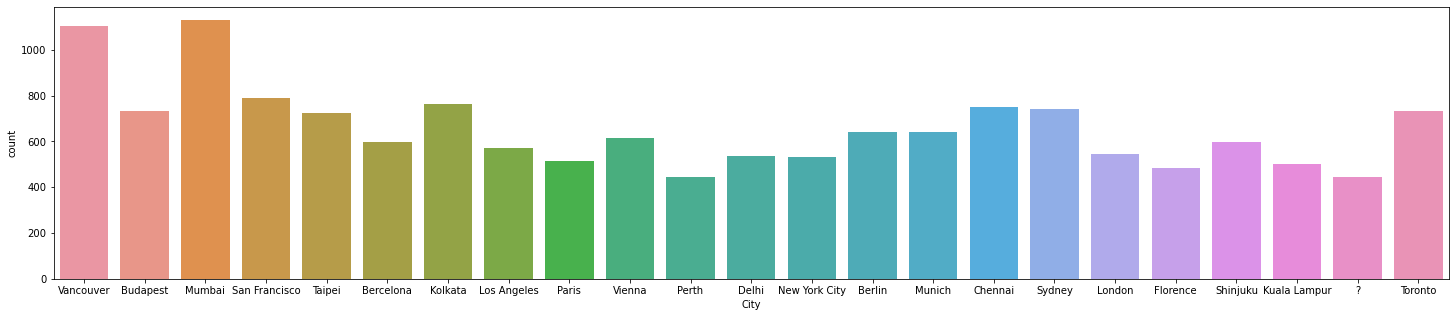

In [24]:
fig = plt.figure(figsize= (25,5))
sns.countplot(newtrain['City'])

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_premium_member', ylabel='count'>

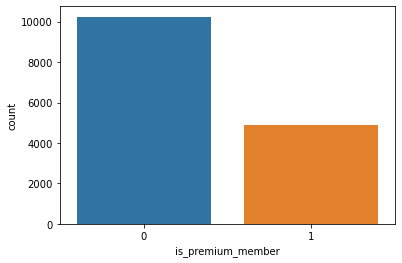

In [25]:
sns.countplot(newtrain['is_premium_member'])

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Preferred_Theme', ylabel='count'>

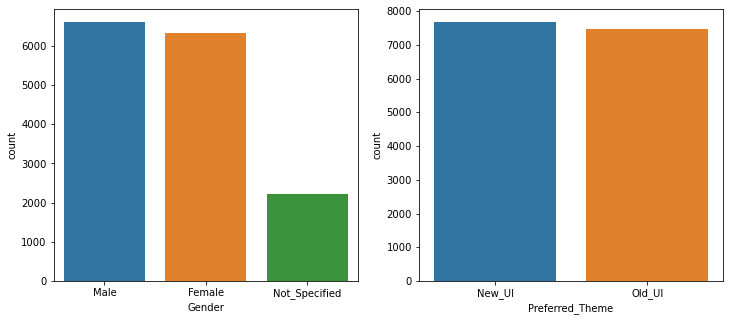

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(newtrain['Gender'], ax = ax[0])
sns.countplot(newtrain['Preferred_Theme'], ax = ax[1])

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='is_premium_member'>

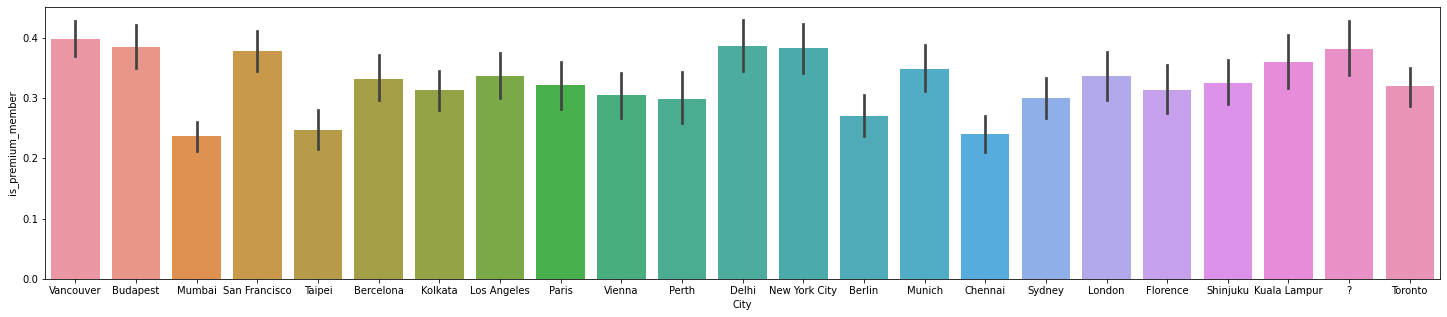

In [27]:
fig = plt.figure(figsize= (25,5))
sns.barplot(newtrain['City'], newtrain['is_premium_member']==1)

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='is_premium_member'>

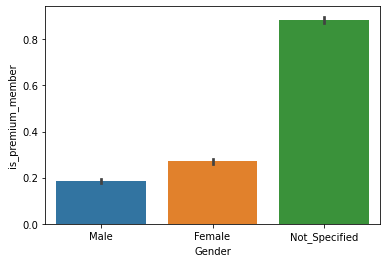

In [28]:
sns.barplot(newtrain['Gender'], newtrain['is_premium_member']==1)

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Home_&_Living'>

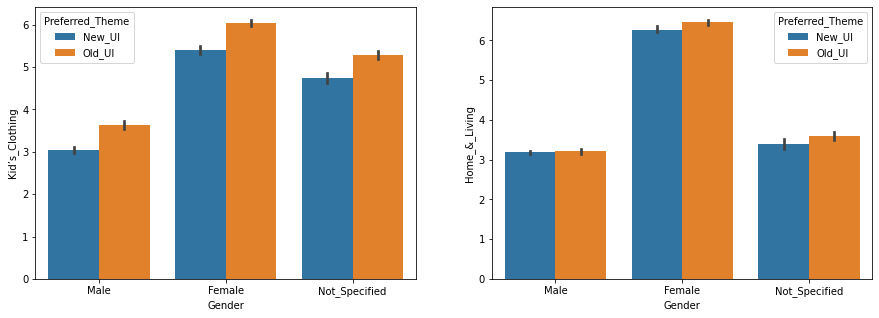

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.barplot(newtrain['Gender'], newtrain['Kid’s_Clothing'], hue = newtrain['Preferred_Theme'], ax = ax[0])
sns.barplot(newtrain['Gender'], newtrain['Home_&_Living'], hue = newtrain['Preferred_Theme'], ax = ax[1])

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Men’s_Clothing'>

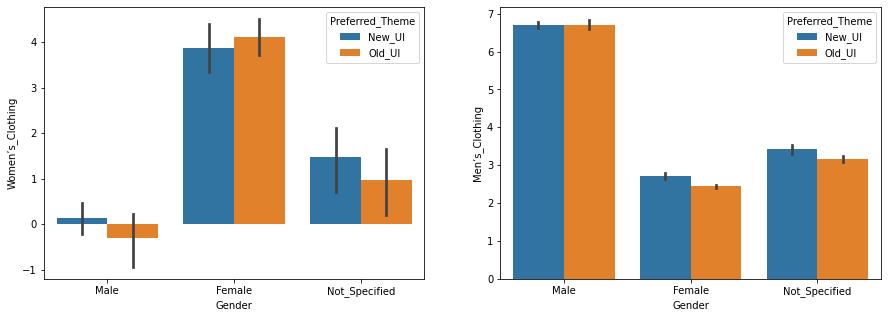

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.barplot(newtrain['Gender'], newtrain['Women’s_Clothing'], hue = newtrain['Preferred_Theme'], ax = ax[0])
sns.barplot(newtrain['Gender'], newtrain['Men’s_Clothing'], hue = newtrain['Preferred_Theme'], ax = ax[1])

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Electronics'>

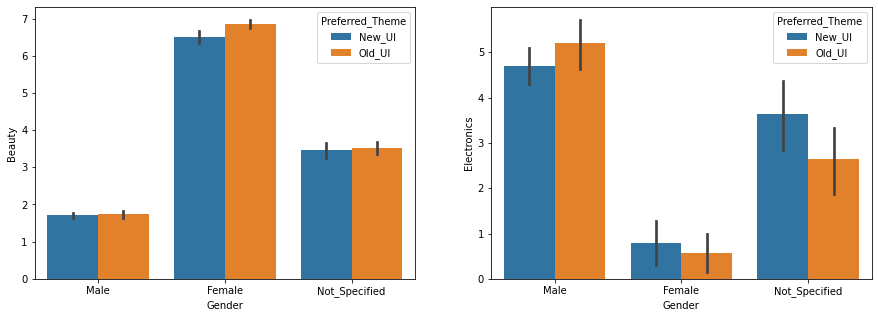

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.barplot(newtrain['Gender'], newtrain['Beauty'], hue = newtrain['Preferred_Theme'], ax = ax[0])
sns.barplot(newtrain['Gender'], newtrain['Electronics'], hue = newtrain['Preferred_Theme'], ax = ax[1])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a13c60f940>,
 'caps': [<matplotlib.lines.Line2D at 0x2a13c61a040>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a13c60f5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a13c61a700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a13c61aa60>],
 'means': []}

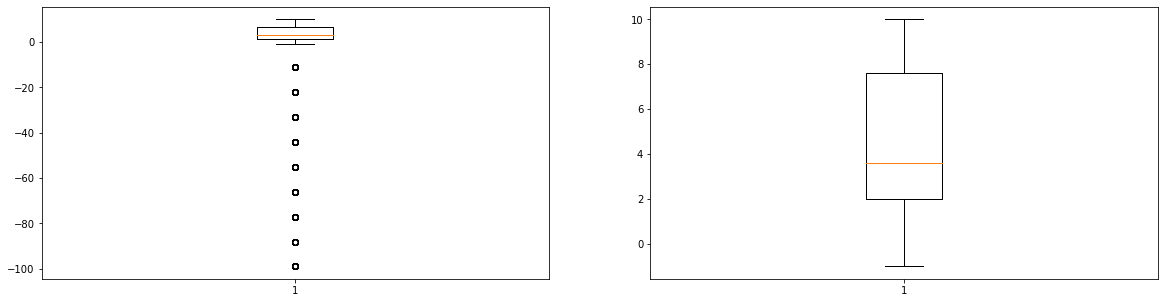

In [32]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['Women’s_Clothing'])
ax2.boxplot(newtrain['Men’s_Clothing'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a13c6c8850>,
 'caps': [<matplotlib.lines.Line2D at 0x2a13c6c8f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a13c6c84f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a13c6d4610>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a13c6d4970>],
 'means': []}

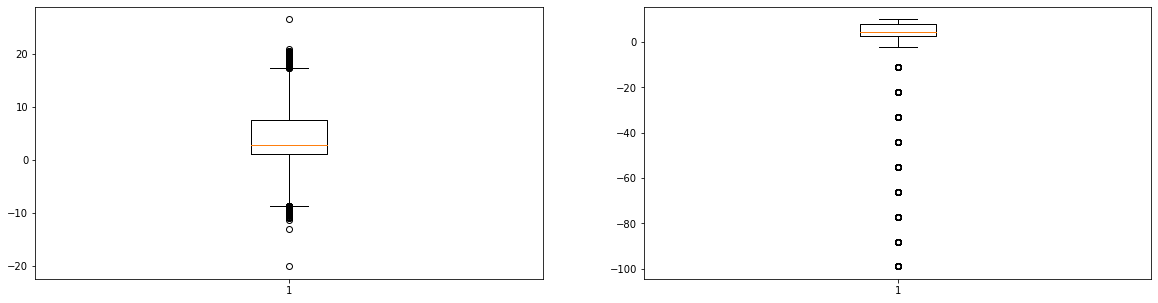

In [33]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['Beauty'])
ax2.boxplot(newtrain['Electronics'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a13c9cd250>,
 'caps': [<matplotlib.lines.Line2D at 0x2a13c9cd910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a13c9c1eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a13c9cdfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a13c9d7370>],
 'means': []}

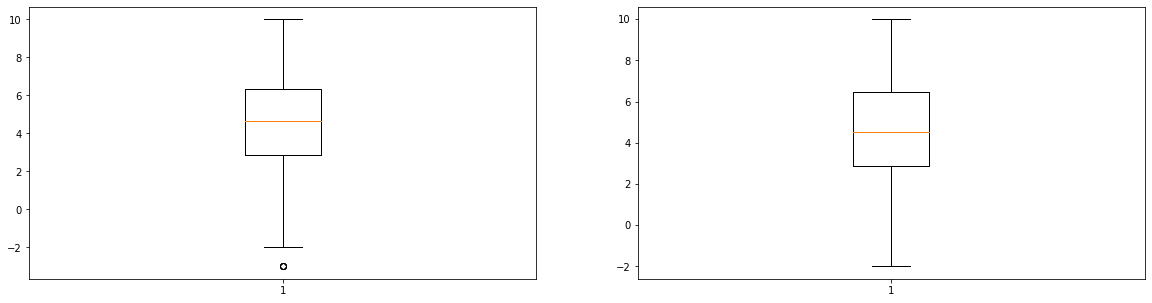

In [34]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['Kid’s_Clothing'])
ax2.boxplot(newtrain['Home_&_Living'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a13ca7dd90>,
 'caps': [<matplotlib.lines.Line2D at 0x2a13ca87490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a13ca7da30>],
 'medians': [<matplotlib.lines.Line2D at 0x2a13ca87b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a13ca87eb0>],
 'means': []}

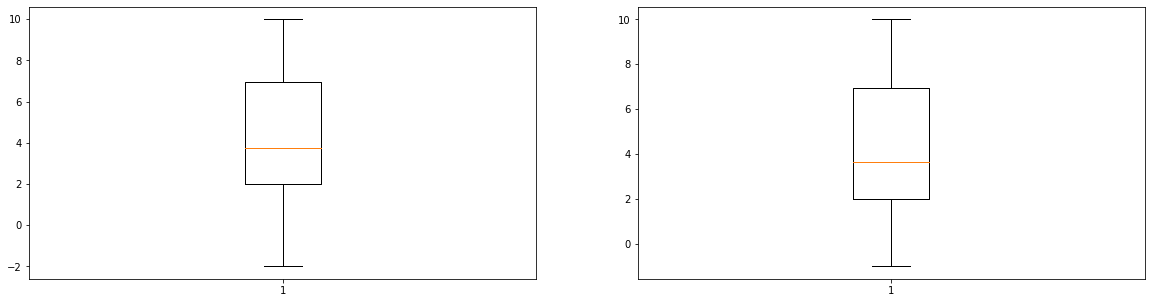

In [35]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtest['Women’s_Clothing'])
ax2.boxplot(newtest['Men’s_Clothing'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a13cb3a370>,
 'caps': [<matplotlib.lines.Line2D at 0x2a13cb3aa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a13cb2ffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a13cb44130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a13cb44430>],
 'means': []}

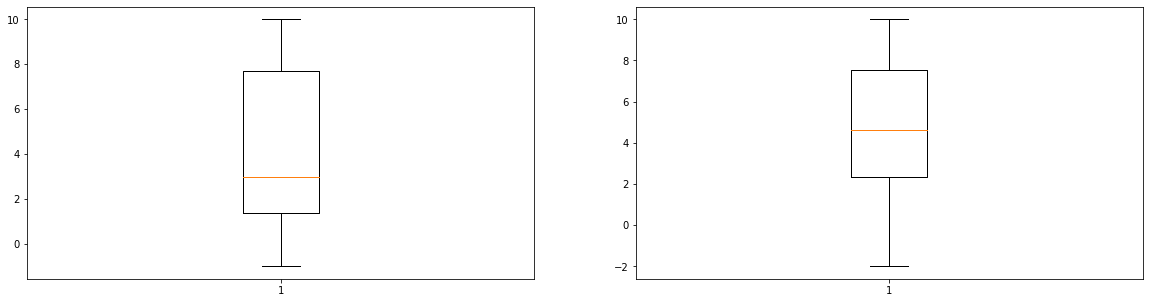

In [36]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtest['Beauty'])
ax2.boxplot(newtest['Electronics'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a13ce8c8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a13ce8cfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a13ce8c580>],
 'medians': [<matplotlib.lines.Line2D at 0x2a13ce986a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a13ce98a00>],
 'means': []}

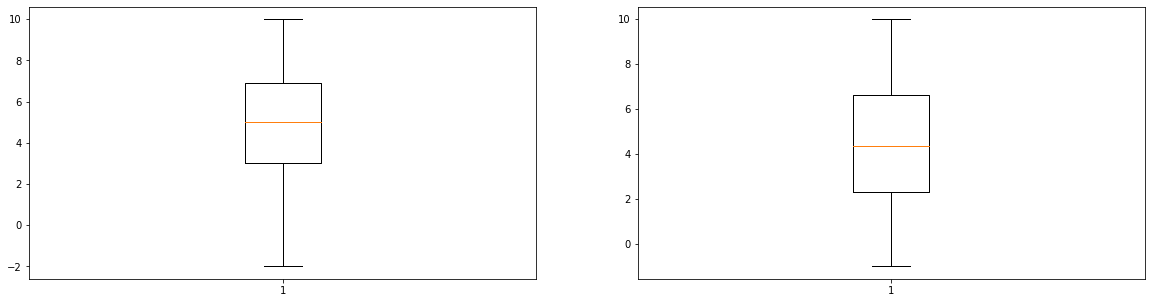

In [37]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtest['Kid’s_Clothing'])
ax2.boxplot(newtest['Home_&_Living'])

In [38]:
def outlier_trim(dataframe, column_name):
    for i in dataframe[column_name]:
        q1 = dataframe[column_name].quantile(0.25)
        q3 = dataframe[column_name].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        if i > upper or i < lower:
            dataframe[column_name] = dataframe[column_name].replace(i, np.median(dataframe[column_name]))

In [39]:
outlier_trim(newtrain, 'Women’s_Clothing')
outlier_trim(newtrain, 'Beauty')
outlier_trim(newtrain, 'Electronics')
outlier_trim(newtrain, 'Kid’s_Clothing')

<ipython-input-38-ba0540473c8d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column_name] = dataframe[column_name].replace(i, np.median(dataframe[column_name]))


{'whiskers': [<matplotlib.lines.Line2D at 0x2a13d55bb50>,
 'caps': [<matplotlib.lines.Line2D at 0x2a13d568250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a13d55b7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a13d568910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a13d568c70>],
 'means': []}

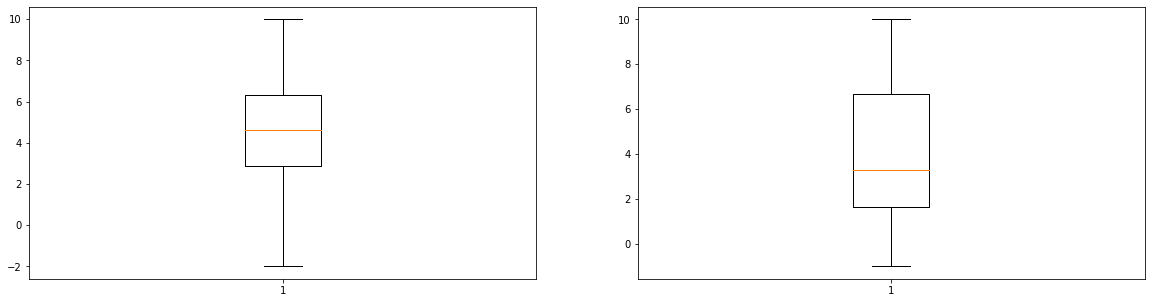

In [40]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['Kid’s_Clothing'])
ax2.boxplot(newtrain['Women’s_Clothing'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a13d5c4c40>,
 'caps': [<matplotlib.lines.Line2D at 0x2a13d5d0340>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a13d5c48e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a13d5d0a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a13d5d0d60>],
 'means': []}

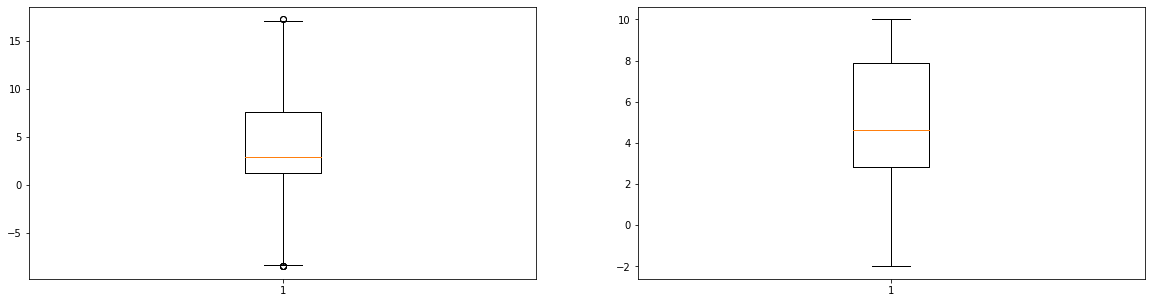

In [41]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['Beauty'])
ax2.boxplot(newtrain['Electronics'])

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
x = ['Gender', 'City', 'State']
for i in x:
    newtrain[i] = le.fit_transform(newtrain[i])
    newtest[i] = le.fit_transform(newtest[i])

<ipython-input-52-a35a5f56d705>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain[i] = le.fit_transform(newtrain[i])


In [53]:
newtrain['Preferred_Theme'] = le.fit_transform(newtrain['Preferred_Theme'])

<ipython-input-53-79744317b782>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain['Preferred_Theme'] = le.fit_transform(newtrain['Preferred_Theme'])


In [55]:
newtrain = newtrain.drop(['CustomerID', 'Sign_up_date', 'Last_order_placed_date'], axis = 1)
newtest = newtest.drop(['CustomerID', 'Sign_up_date', 'Last_order_placed_date'], axis = 1)

In [56]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15150 entries, 0 to 15149
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  15150 non-null  float64
 1   Gender               15150 non-null  int32  
 2   City                 15150 non-null  int32  
 3   State                15150 non-null  int32  
 4   No_of_orders_placed  15150 non-null  float64
 5   is_premium_member    15150 non-null  int64  
 6   Women’s_Clothing     15150 non-null  float64
 7   Men’s_Clothing       15150 non-null  float64
 8   Kid’s_Clothing       15150 non-null  float64
 9   Home_&_Living        15150 non-null  float64
 10  Beauty               15150 non-null  float64
 11  Electronics          15150 non-null  float64
 12  Preferred_Theme      15150 non-null  int32  
dtypes: float64(8), int32(4), int64(1)
memory usage: 1.9 MB


In [57]:
x = newtrain.drop('Preferred_Theme', axis = 1)
y = newtrain['Preferred_Theme']

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [59]:
from sklearn.metrics import accuracy_score

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
y_pred = lr.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.6706270627062706


C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7217821782178218


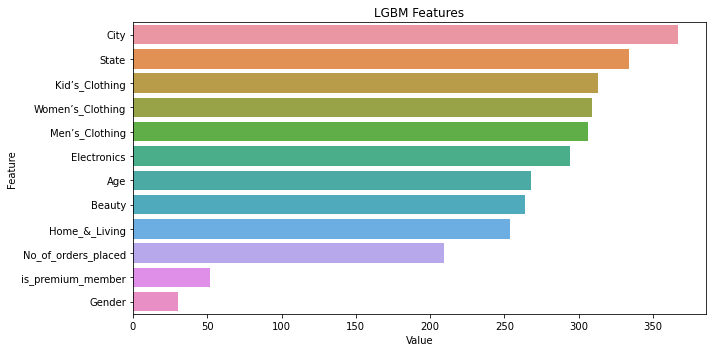

In [73]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features')
plt.tight_layout()
plt.show()

In [80]:
x_train = newtrain.drop(['is_premium_member', 'Gender', 'Preferred_Theme'], axis = 1)
y_train = newtrain['Preferred_Theme']
x_test = newtest.drop(['is_premium_member', 'Gender'], axis = 1)

In [81]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'CustomerID': test.CustomerID, 'Preferred_Theme': le.inverse_transform(y_pred)})

In [82]:
solution.head()

,CustomerID,Preferred_Theme
0,CusID_09654,New_UI
1,CusID_09727,Old_UI
2,CusID_07391,Old_UI
3,CusID_08577,Old_UI
4,CusID_08122,Old_UI


In [83]:
solution.to_csv('Solution.csv', index = False)